In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanicdataset-traincsv/train.csv


In [3]:
# Load the data
data=pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#import classification module from pycaret
from pycaret.classification import *
#intialize the setup and choose target
exp_clf = setup(data, target = 'Survived')
# Data preprocessing: Null value imputation

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7622
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
#Create and compare various models and check performance on various metrics
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.817,0.8534,0.7114,0.7979,0.744,0.6036
1,Logistic Regression,0.8153,0.8559,0.7326,0.7738,0.7502,0.6044
2,Ridge Classifier,0.8137,0,0.7201,0.7773,0.7455,0.5994
3,Decision Tree Classifier,0.8057,0.7865,0.7034,0.7729,0.7323,0.581
4,Gradient Boosting Classifier,0.8057,0.8573,0.6991,0.7758,0.73,0.5799
5,Extra Trees Classifier,0.8009,0.857,0.6824,0.7729,0.7235,0.5693
6,CatBoost Classifier,0.8009,0.8576,0.6658,0.7863,0.7167,0.5657
7,Light Gradient Boosting Machine,0.7977,0.8517,0.7199,0.749,0.7298,0.5688
8,Ada Boost Classifier,0.7864,0.8375,0.6906,0.7347,0.7095,0.5416
9,Random Forest Classifier,0.7802,0.8303,0.6111,0.7728,0.6806,0.5166


In [14]:
# create one model after comparision
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9048,0.9028,0.9167,0.8462,0.8800,0.8013
1,0.8254,0.8403,0.6667,0.8421,0.7442,0.6144
2,0.7937,0.8098,0.7083,0.7391,0.7234,0.5590
3,0.8387,0.8785,0.8261,0.7600,0.7917,0.6605
4,0.9032,0.9090,0.8333,0.9091,0.8696,0.7929
5,0.7903,0.8717,0.7083,0.7391,0.7234,0.5547
6,0.8548,0.8871,0.7917,0.8261,0.8085,0.6917
7,0.7258,0.7971,0.5417,0.6842,0.6047,0.3991
8,0.7742,0.8618,0.7500,0.6923,0.7200,0.5313
9,0.7419,0.8004,0.5833,0.7000,0.6364,0.4389


In [15]:
# Tune the Logistic regression model
tuned_lr = tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8889,0.8697,0.9167,0.8148,0.8627,0.7700
1,0.8095,0.7965,0.7083,0.7727,0.7391,0.5896
2,0.7619,0.8045,0.7083,0.6800,0.6939,0.4992
3,0.8226,0.8629,0.8261,0.7308,0.7755,0.6298
4,0.8710,0.9068,0.7917,0.8636,0.8261,0.7238
5,0.7742,0.8432,0.7083,0.7083,0.7083,0.5241
6,0.8387,0.8805,0.8333,0.7692,0.8000,0.6652
7,0.7581,0.8246,0.5833,0.7368,0.6512,0.4698
8,0.7903,0.8827,0.7500,0.7200,0.7347,0.5615
9,0.7742,0.7873,0.7083,0.7083,0.7083,0.5241


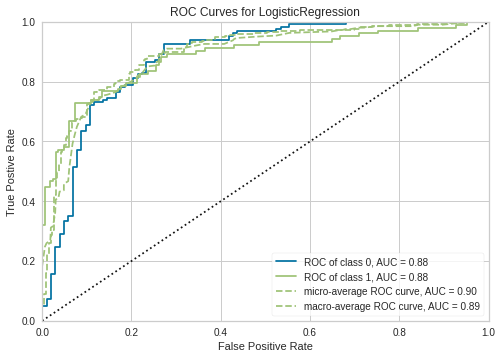

In [16]:
#plot a model: ROC-AUC curve
plot_model(lr)

In [17]:
#evaluate a model
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.8526,0.8333,0.8000,0.8163,0.6995
1,0.8254,0.7788,0.5833,0.9333,0.7179,0.6010
2,0.7778,0.7564,0.6667,0.7273,0.6957,0.5212
3,0.8710,0.8618,0.8261,0.8261,0.8261,0.7235
4,0.8226,0.8169,0.7917,0.7600,0.7755,0.6289
5,0.7419,0.7127,0.5833,0.7000,0.6364,0.4389
6,0.8710,0.8640,0.8333,0.8333,0.8333,0.7281
7,0.7258,0.6919,0.5417,0.6842,0.6047,0.3991
8,0.8065,0.7961,0.7500,0.7500,0.7500,0.5921
9,0.7581,0.7336,0.6250,0.7143,0.6667,0.4781


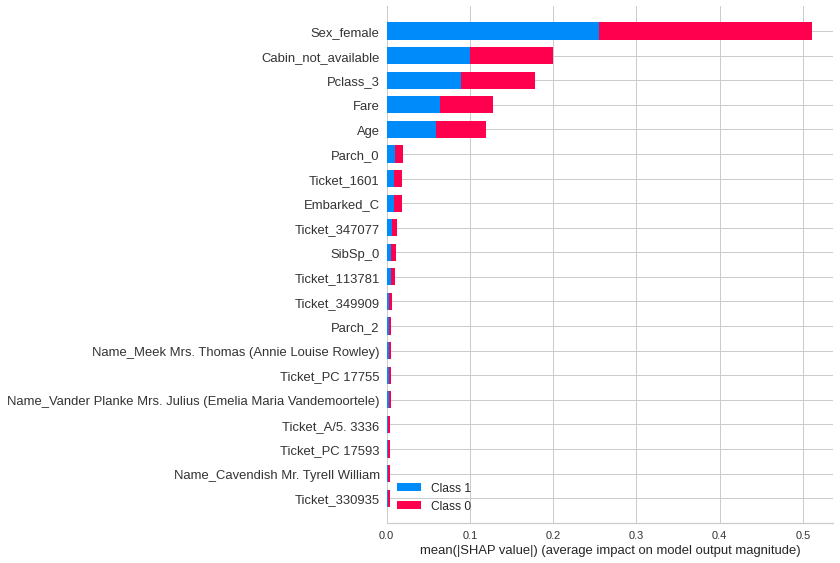

In [19]:
#create a tree base model to interpret model and check feature importance
dt = create_model('dt')
#interpret a model
interpret_model(dt)

In [ ]:
#optimize threshold for trained LR model
optimize_threshold(lr)

In [22]:
#generate predictions on hold-out set using trained model
lr_predictions_holdout = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.806,0.8826,0.767,0.7383,0.7524,0.593


In [23]:
#finalize trained model
finalize_model(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7622, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
#deploy trained model on cloud
deploy_model(model = lr, model_name = 'deploy_lr', platform = 'flask', authentication = {'bucket' : 'pycaret-test'})

In [26]:
#save trained model and transform pipeline
save_model(lr, 'lr_model_23122019')

Transformation Pipeline and Model Succesfully Saved


In [27]:
# Load the saved model
saved_lr = load_model('lr_model_23122019')

Transformation Pipeline and Model Sucessfully Loaded


In [28]:
# Save the experiment
save_experiment('experiment_23122019')

Experiment Succesfully Saved


In [29]:
# Load experiment
saved_experiment = load_experiment('experiment_23122019')

,Object
0,Classification Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Compare Models Score Grid
7,CatBoost Classifier
8,CatBoost Classifier Score Grid
9,Tuned <catboost.core.CatBoostClassifier object...
